In [48]:
import pandas as pd

In [49]:
df_booking = pd.read_csv("fact_bookings.csv")
df_booking.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [50]:
df_booking.shape

(134590, 12)

In [51]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [52]:
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [53]:
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

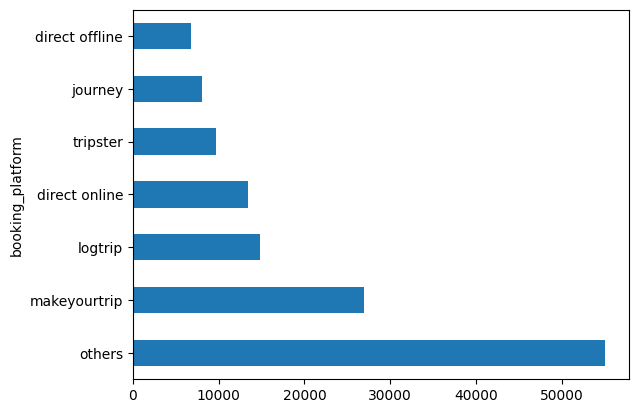

In [54]:
df_booking.booking_platform.value_counts().plot(kind="barh")

In [55]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [56]:
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [57]:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")

In [58]:
df_hotels.shape

(25, 4)

In [59]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [60]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [61]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

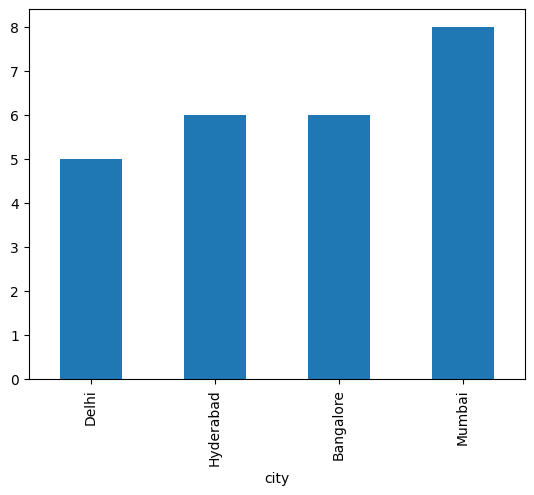

In [62]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

Data Cleaning

In [63]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [64]:
df_booking[df_booking.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [65]:
df_bookings = df_booking[df_booking.no_guests>0]
df_bookings.shape

(134578, 12)

In [66]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [67]:
avg, std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [68]:
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [69]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [70]:
lower_limit = avg - 3*std
lower_limit

np.float64(-263742.4278567056)

In [71]:
df_booking[df_booking.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [72]:
df_bookings= df_booking[df_booking.revenue_generated<higher_limit]
df_bookings.shape

(134585, 12)

In [73]:
df_bookings.revenue_realized.describe()

count    134585.000000
mean      12696.095025
std        6928.058192
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [74]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

np.float64(33480.26960155918)

In [75]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050
134581,Jul312217564RT42,17564,31-07-22,31-07-22,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760


In [76]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [77]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16073.000000
mean     23440.103652
std       9048.865206
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [78]:
23439 +3*9048

50583

In [79]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                3
room_category            0
booking_platform         0
ratings_given        77905
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Data Transformation

In [80]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [81]:
df_agg_bookings["Occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]

In [82]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [83]:
df_agg_bookings["Occ_pct"]= df_agg_bookings["Occ_pct"].apply(lambda X: round(X*100,2))
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89


1. what is an averrage occupancy rate in each of the room categories?

In [84]:
df_agg_bookings.groupby("room_category")["Occ_pct"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: Occ_pct, dtype: float64

In [85]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [86]:
df =pd.merge(df_agg_bookings,df_rooms,left_on="room_category",right_on="room_id")
df.tail(5)


,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_id,room_class
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [87]:
df.groupby("room_class")["Occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: Occ_pct, dtype: float64

In [44]:
df.drop("room_id",axis=1,inplace=True)
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


2.Print average occupancy rate per city

In [89]:
df_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [91]:
df = pd.merge(df,df_hotels,on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_id,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore


<Axes: xlabel='city_y'>

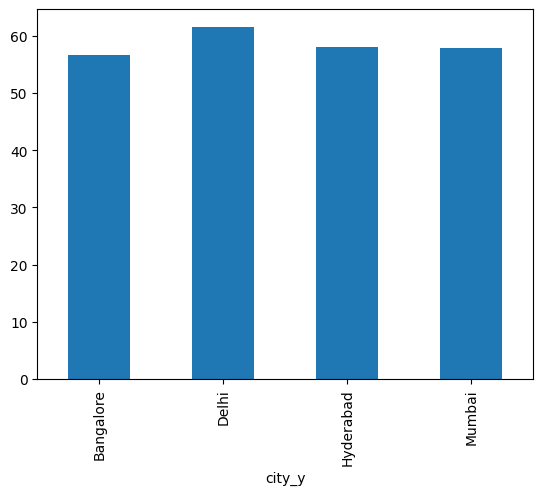

In [93]:
df.groupby('city_y')["Occ_pct"].mean().plot(kind="bar")

3.when was the occupancy better?weekday or weekend?

In [94]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_id,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore


In [95]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [96]:
df = pd.merge(df,df_date, left_on="check_in_date",right_on="date")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_id,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,RT1,Standard,Atliq City,Business,Hyderabad,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,RT1,Standard,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday


In [98]:
df.groupby("day_type")["Occ_pct"].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: Occ_pct, dtype: float64

4.In the month of june, what is the occupancy for different cities.

In [99]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [107]:
df_june_22.groupby("city_y")["Occ_pct"].mean().round(2).sort_values(ascending=False)

city_y
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: Occ_pct, dtype: float64

In [106]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_id,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,RT1,Standard,Atliq Grands,Luxury,Mumbai,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [109]:
df_august_data = pd.read_csv("new_data_august.csv")
df_august_data

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92
5,17561,Atliq Blu,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,18,26,69.23
6,17564,Atliq Seasons,Business,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,10,16,62.50


In [110]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'Occ_pct', 'room_id', 'room_class', 'property_name_x',
       'category_x', 'city_x', 'property_name_y', 'category_y', 'city_y',
       'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [112]:
df_august_data.shape

(7, 13)

In [113]:
df.shape

(6500, 18)

In [115]:
latest_df = pd.concat([df,df_august_data],ignore_index=True,axis=0)
latest_df.tail()


,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_pct,room_id,room_class,property_name_x,category_x,...,category_y,city_y,date,mmm yy,week no,day_type,property_name,category,city,occ%
6502,19563,01-Aug-22,RT1,23,30.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Aug-22,W 32,weekeday,Atliq Palace,Business,Bangalore,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Aug-22,W 32,weekeday,Atliq Grands,Luxury,Bangalore,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Aug-22,W 32,weekeday,Atliq City,Business,Bangalore,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Aug-22,W 32,weekeday,Atliq Blu,Luxury,Mumbai,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Aug-22,W 32,weekeday,Atliq Seasons,Business,Mumbai,62.50


In [116]:
latest_df.shape

(6507, 22)

6.print revenue realized per city

In [117]:
df_booking.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [118]:
df_bookings_all = pd.merge(df_booking,df_hotels,on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [119]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

7.Print month by month revenue

In [120]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [121]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [122]:
pd.merge(df_bookings_all,df_date,left_on="check_in_date",right_on="date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [123]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  property_name      134590 non-null  object 
 13  category           134590 non-null  object 
 14  city               134590 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [125]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [128]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [129]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB
